In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eeg_data=pd.read_csv("EEG Eye State.csv")
eeg_data.shape
eeg_data.head(4)

,Unnamed: 0,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'


In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(eeg_data, test_size=0.05)

In [4]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(15,1)),
    tf.keras.layers.Dense(14,activation='relu'),
    tf.keras.layers.Dense(13,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(16,activation='softmax'),
    
])
print(model.summary())

C:\Users\shivs\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 14)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │             195 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             176 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 735 (2.87 KB)

 Trainable params: 735 (2.87 KB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
model.compile(
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
metrics=["accuracy"]
)

In [6]:
train.loc[train['eyeDetection']=="b'0'", 'eyeDetection'] = 0
train.loc[train['eyeDetection']=="b'1'", 'eyeDetection'] = 1

In [7]:
y_train=train['eyeDetection']
x_train=train.drop(['eyeDetection'],axis=1)

In [8]:
test.loc[test['eyeDetection']=="b'0'", 'eyeDetection'] = 0
test.loc[test['eyeDetection']=="b'1'", 'eyeDetection'] = 1
y_test=test['eyeDetection']
y_test.head(3)

6842     1
12970    0
5019     0
Name: eyeDetection, dtype: object

In [16]:
x_test=train.drop(['eyeDetection'],axis=1)
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

history=model.fit(x_train,y_train,batch_size=64,epochs=180)

Epoch 1/180
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6888 - loss: 0.5920
Epoch 2/180
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6887 - loss: 0.5891
Epoch 3/180
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6989 - loss: 0.5919
Epoch 4/180
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6849 - loss: 0.5973
Epoch 5/180
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6912 - loss: 0.5917
Epoch 6/180
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6901 - loss: 0.5902
Epoch 7/180
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6920 - loss: 0.5865
Epoch 8/180
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6901 - loss: 0.5898
Epoch 9/180
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6926 - loss: 0.5867
Epoch 10/180
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6960 - loss: 0.5913
Epoch 11/180
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6958 - loss: 0.5864
Epoch 12/180
223/223 ━━━━━━━━━━━━━━━━━━━━

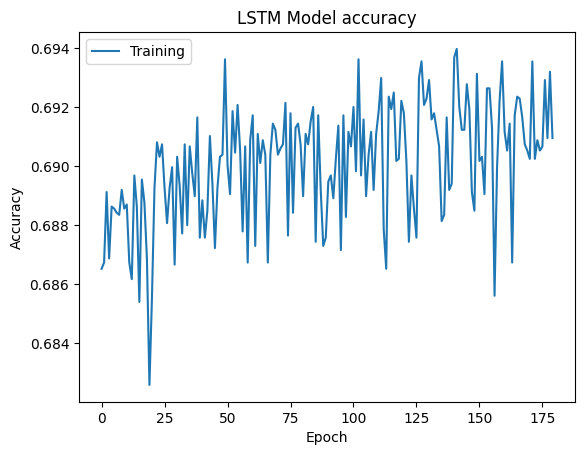

In [19]:
plt.plot(history.history['accuracy'])
plt.title("LSTM Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training"])
plt.show()

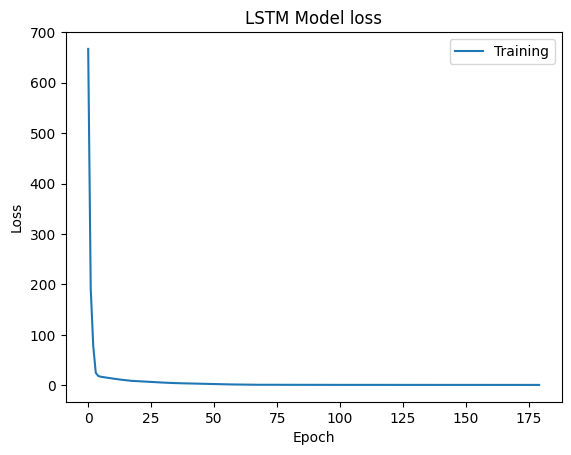

In [14]:
plt.plot(history.history['loss'])
plt.title("LSTM Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training"])
plt.show()

In [15]:
x_test = np.asarray(x_train).astype('float32')
y_test = np.asarray(y_train).astype('float32')
model.evaluate(x_test,y_test,batch_size=64)

223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6938 - loss: 0.5921


[0.5905318856239319, 0.698756217956543]

In [17]:
lstm_model=tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(256,return_sequences=True,input_shape=(15,1)))
lstm_model.add(tf.keras.layers.LSTM(256,input_shape=(15,1)))
lstm_model.add(tf.keras.layers.Dense(10,activation=tf.nn.relu))
print(lstm_model.summary())
lstm_model.compile(
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
metrics=["accuracy"]
)

C:\Users\shivs\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 15, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 792,074 (3.02 MB)

 Trainable params: 792,074 (3.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
history_lstm=lstm_model.fit(x_train,y_train,epochs=20,batch_size=50,verbose=1)

Epoch 1/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 43s 123ms/step - accuracy: 0.4376 - loss: 1.9297
Epoch 2/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 37s 128ms/step - accuracy: 0.4487 - loss: 1.9013
Epoch 3/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 36s 125ms/step - accuracy: 0.4562 - loss: 1.8902
Epoch 4/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 37s 129ms/step - accuracy: 0.4506 - loss: 1.8912
Epoch 5/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 37s 129ms/step - accuracy: 0.4592 - loss: 1.8657
Epoch 6/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 36s 128ms/step - accuracy: 0.4625 - loss: 1.8599
Epoch 7/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 36s 128ms/step - accuracy: 0.4530 - loss: 1.8766
Epoch 8/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 35s 123ms/step - accuracy: 0.4579 - loss: 1.8657
Epoch 9/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 35s 123ms/step - accuracy: 0.4536 - loss: 1.8748
Epoch 10/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 36s 126ms/step - accuracy: 0.4697 - loss: 1.7212
Epoch 11/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 33s 115ms/step - accuracy: 0.5870 - loss: 0.6614
Epoch 12/20
285/285

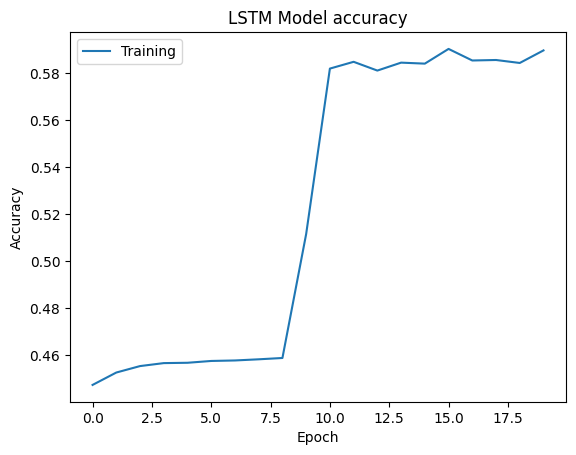

In [20]:
plt.plot(history_lstm.history['accuracy'])
plt.title("LSTM Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training"])
plt.show()

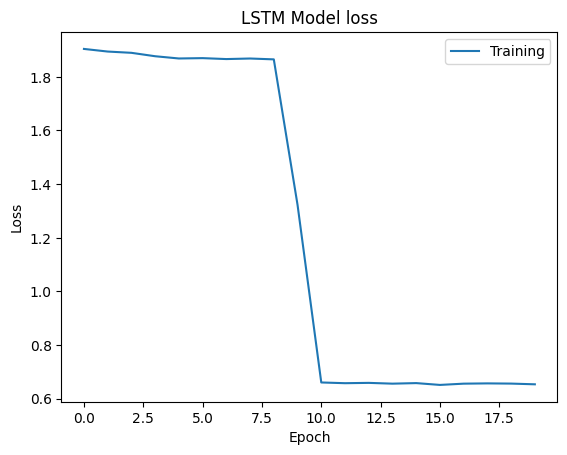

In [21]:
plt.plot(history_lstm.history['loss'])
plt.title("LSTM Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training"])
plt.show()

In [22]:
lstm_model.evaluate(x_test,y_test,batch_size=64,verbose=1)

223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5743 - loss: 0.6710


[0.6706420183181763, 0.571358323097229]